<h1><u> Classification & Analysis of Car Evaluation </h1></u><br>
The aim of this project is to perform classification on the dataset to build a machine learning model using the training data to effectively classify the test data instances based on the classifier model. <br>
The different classification algorithms used are- 
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree <br>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [0]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the car.csv dataset and checking its contents

dataset = pd.read_csv('car.csv')
dataset.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
dataset.info()  # Columns of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
dataset.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,5more,4,med,med,unacc
freq,432,432,432,576,576,576,1210


In [6]:
# Displaying the different attribute values of each independant variable/feature

print("The unique values in each column- \n")
for i in dataset.columns:
    print(i, ":  ", dataset[i].unique())

The unique values in each column- 

buying :   ['vhigh' 'high' 'med' 'low']
maint :   ['vhigh' 'high' 'med' 'low']
doors :   ['2' '3' '4' '5more']
persons :   ['2' '4' 'more']
lug_boot :   ['small' 'med' 'big']
safety :   ['low' 'med' 'high']
class :   ['unacc' 'acc' 'vgood' 'good']


### Visualizing various plots for the data

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


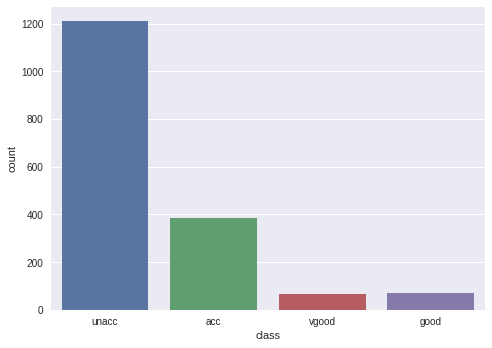

In [7]:
# Countplot for the various output classes in the dataset

plt.figure(figsize=(7,5))
sns.countplot(x = 'class', data = dataset)
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


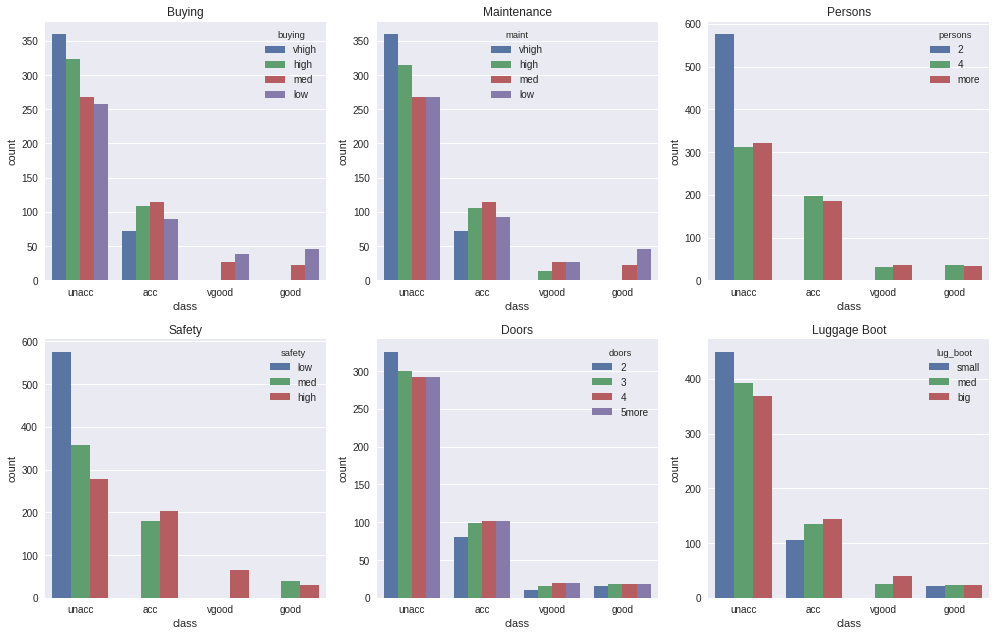

In [8]:
# Countplots to visualize how each feature affects the ouput class of a car

fig, axes = plt.subplots(2,3, figsize=(14,9))
axes[0,0].set_title('Buying')
sns.countplot(x = 'class', hue='buying', data = dataset, ax=axes[0,0])
axes[1,0].set_title('Safety')
sns.countplot(x = 'class', hue='safety', data = dataset, ax=axes[1,0])
axes[0,1].set_title('Maintenance')
sns.countplot(x = 'class', hue='maint', data = dataset, ax=axes[0,1])
axes[1,1].set_title('Doors')
sns.countplot(x = 'class', hue='doors', data = dataset, ax=axes[1,1])
axes[0,2].set_title('Persons')
sns.countplot(x = 'class', hue='persons', data = dataset, ax=axes[0,2])
axes[1,2].set_title('Luggage Boot')
sns.countplot(x = 'class', hue='lug_boot', data = dataset, ax=axes[1,2])

plt.tight_layout()

### Data Pre-processing

In [0]:
# Dividing the dataset into X -> independant variables and y-> dependant variable

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 6]

In [0]:
# Since all the features are categorical, we don't need to use Standard Scaler to uniformly scale the features
# Thus for all the categorical features, we need to perform Label Encoding and One Hot Encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_x = LabelEncoder()
le_y = LabelEncoder()

X = X.apply(le_x.fit_transform)
X = X.values

y = le_y.fit_transform(y)
#y.reshape(-1,1)    # Reshaping y from 1-dimensional to 2-dimensional array for further processing 

ohe_x = OneHotEncoder(categorical_features=[0,1,2,3,4,5])
X = ohe_x.fit_transform(X).toarray()

# ohe_y = OneHotEncoder(categorical_features=[0])
# y = ohe_y.fit_transform(y).toarray()

In [0]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Classification using different algorithms

<b><u> Logistic Regression 

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()    # Creating an object of the LogisticRegression class
classifier.fit(X_train, y_train)     # Calling the fit method of the class using the object

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)    # Using the predict method to classify test instances using the model

In [0]:
# Metrics to compare the predicted outputs with the actual outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [15]:
print('\n Accuracy: ', acc)
print('\n Confusion Matrix: \n', cm)
print('\n Classification Report: \n', cr)


 Accuracy:  0.8410404624277457

 Confusion Matrix: 
 [[ 59   2  18   0]
 [ 15   0   0   2]
 [ 11   0 229   0]
 [  7   0   0   3]]

 Classification Report: 
              precision    recall  f1-score   support

          0       0.64      0.75      0.69        79
          1       0.00      0.00      0.00        17
          2       0.93      0.95      0.94       240
          3       0.60      0.30      0.40        10

avg / total       0.81      0.84      0.82       346



<br>

<b><u> K-Nearest Neighbors 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Implementing the elbow method to find the best K value for the classifier

error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

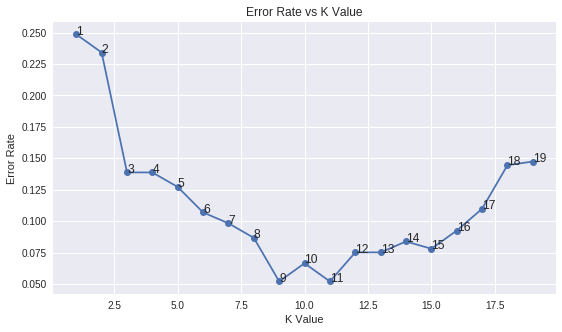

In [18]:
# Plotting the elbow method graph to determine the optimal K value

plt.figure(figsize=(9,5))
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.plot(range(1,20), error_rate, marker='o')

for a,b in zip(range(1,20), error_rate):
    plt.text(a, b, str(a))

From the graph we can see that the error rate is lowest for K=9 and K=11, thus we will choose K=9 i.e 9 neighbors to create the KNN classifier

In [19]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [22]:
print('\n Accuracy: ', acc)
print('\n Confusion Matrix: \n', cm)
print('\n Classification Report: \n', cr)


 Accuracy:  0.9479768786127167

 Confusion Matrix: 
 [[ 74   1   4   0]
 [  7   9   0   1]
 [  2   0 238   0]
 [  3   0   0   7]]

 Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.94      0.90        79
          1       0.90      0.53      0.67        17
          2       0.98      0.99      0.99       240
          3       0.88      0.70      0.78        10

avg / total       0.95      0.95      0.95       346



<br>

<b><u> Decision Tree

In [0]:
# Since we will be using only label encoding for decision trees, we need to reinitialize X and y

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 6]

In [0]:
le_x = LabelEncoder()
le_y = LabelEncoder()

X = X.apply(le_x.fit_transform)
X = X.values

y = le_y.fit_transform(y)

In [0]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [29]:
print('\n Accuracy: ', acc)
print('\n Confusion Matrix: \n', cm)
print('\n Classification Report: \n', cr)


 Accuracy:  0.9884393063583815

 Confusion Matrix: 
 [[ 76   2   1   0]
 [  0  17   0   0]
 [  0   0 240   0]
 [  1   0   0   9]]

 Classification Report: 
              precision    recall  f1-score   support

          0       0.99      0.96      0.97        79
          1       0.89      1.00      0.94        17
          2       1.00      1.00      1.00       240
          3       1.00      0.90      0.95        10

avg / total       0.99      0.99      0.99       346



Visualizing the generated Decision Tree

In [30]:
# Installing libraries for visualizing decision tree

!apt-get install graphviz
!pip install pydot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,154 kB of

In [33]:
!pip install graphviz

In [34]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot
import graphviz

features = list(dataset.columns[:-1])
target = dataset['class'].unique()
print("Features: ", features)
print("Target: ", target)

Features:  ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Target:  ['unacc' 'acc' 'vgood' 'good']


In [0]:
# Exporting the decision tree in DOT format as 'tree.dot'

export_graphviz(classifier, out_file='tree.dot', feature_names = features, class_names = target, 
                rounded = True, proportion = False, filled = True)

In [0]:
!dot -Tpng tree.dot -o tree.png -Gdpi=50    # Converting the dot file into a graph image as 'tree.png'

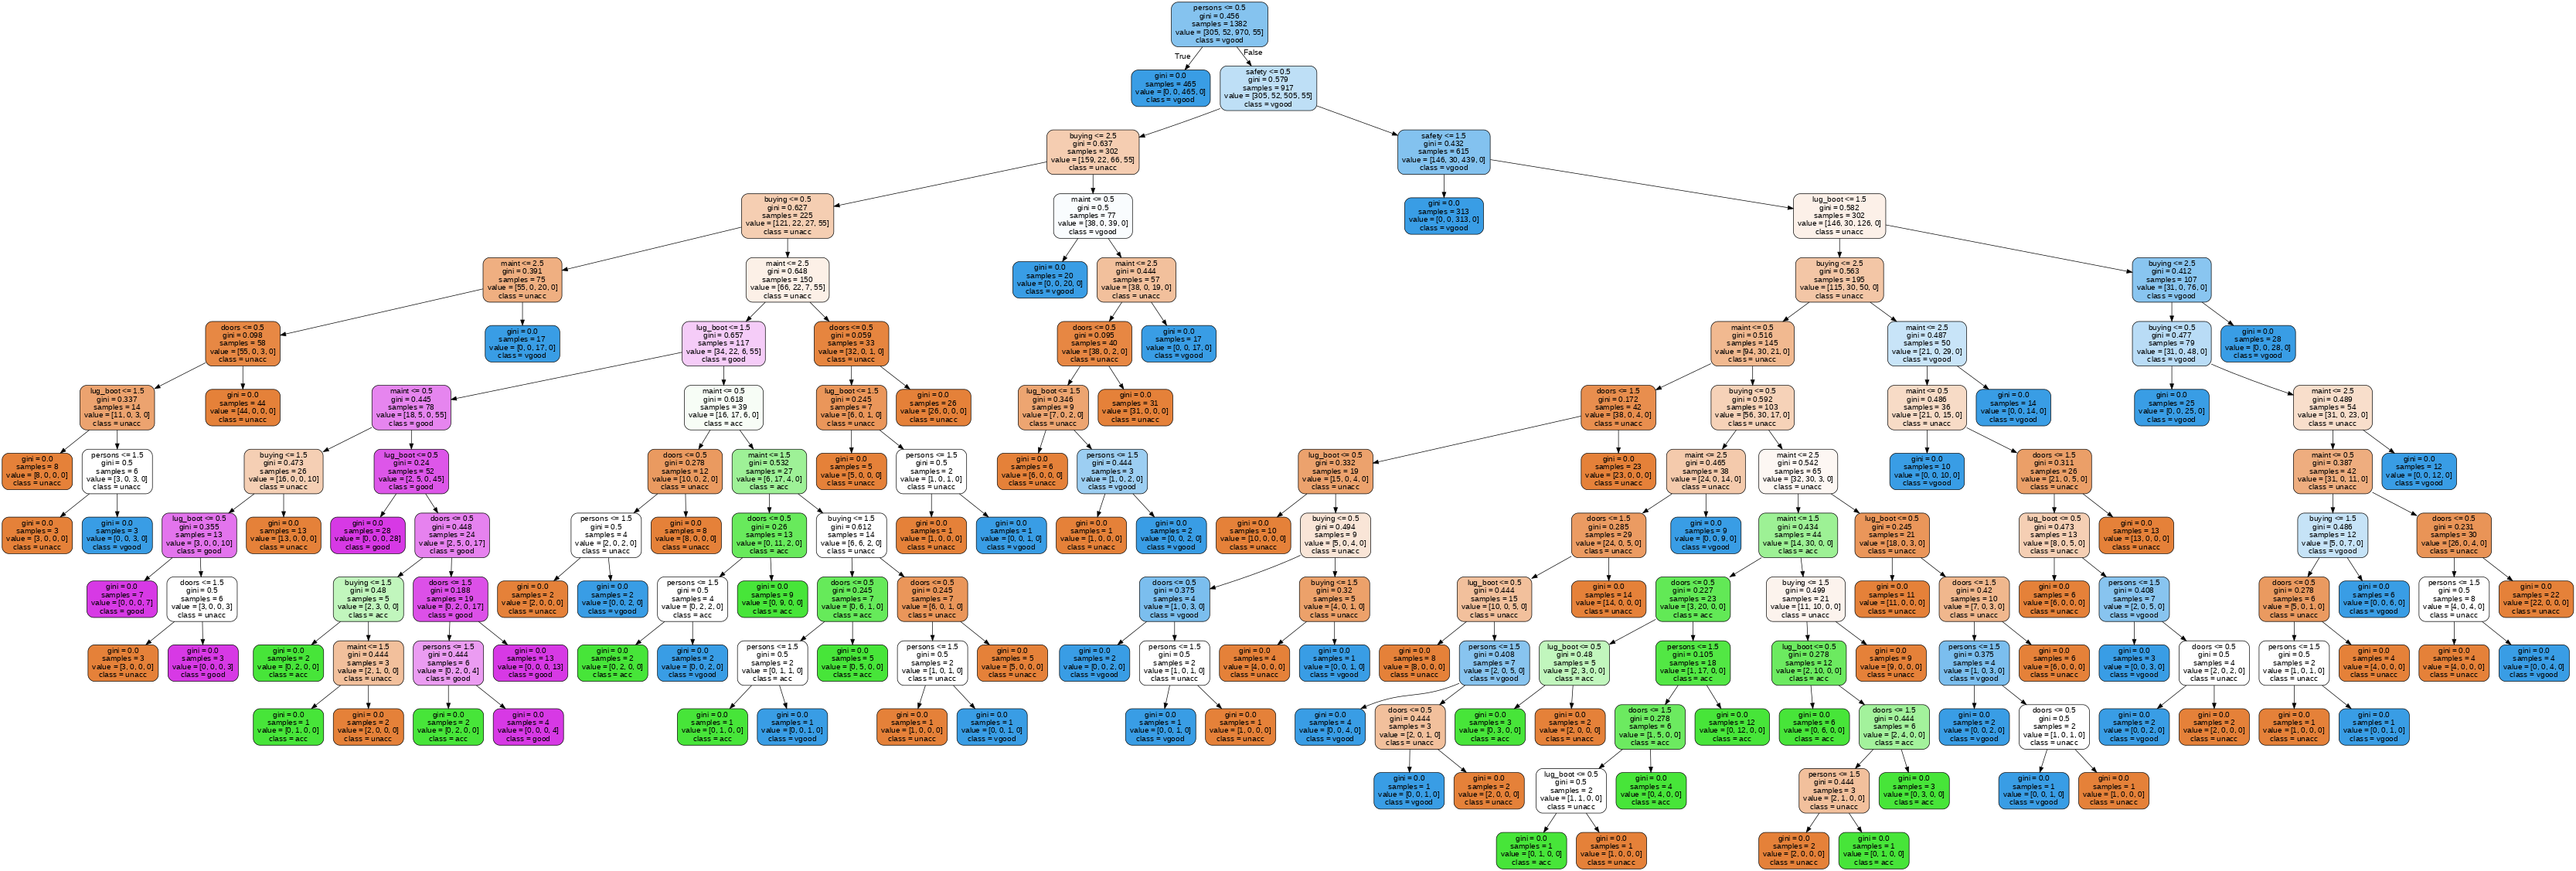

In [39]:
Image(filename = 'tree.png')    # Displaying the tree

In [40]:
ls

car.csv  sample_data/  tree.dot  tree.png


In [0]:
files.download("tree.png")